# Détection automatique de faux billets

In [36]:
import pandas as pd

In [37]:
# Dans le fichier, les données sont séparées par un ';' et non une ',': il faut donc préciser le séparateur 

billets= pd.read_csv('/Users/oliviavolpi/MOOC/OpenClassroom-DataAnalyst/Open Classroom - Projet 10/billets.csv'
                     ,sep=';'
                    )

Les données fournies nous donnent les informations recueuillies sur __1500 billets observés__: 1000 sont vrais, 500 sont faux (colonne _"is_genuine"_). 

Les autres informations sont relatives aux __diverses mesures__ de ces billets : longueur, hauteur mesurée dans le coin gauche et le coin droit, diagonale, marge en haut et en bas. 


In [38]:
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


On constate qu'il y a des __données manquantes__ dans les mesures de la marge inférieure. 

On choisit d'opérer une __régression linéaire__ pour les extrapoler à partir des autres données disponibles. 

In [39]:
# Observons les lignes où l'information fait défaut

marge_null = billets[billets.isna().any(axis=1)]

# Relevons les id des billets dont on n'a pas la mesure "margin_low"

In [40]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

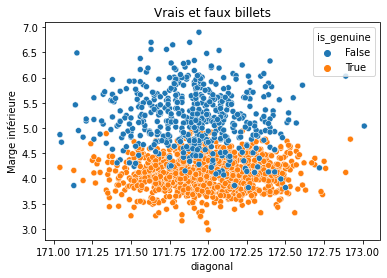

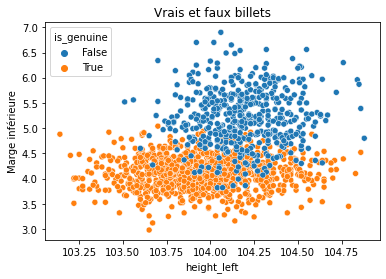

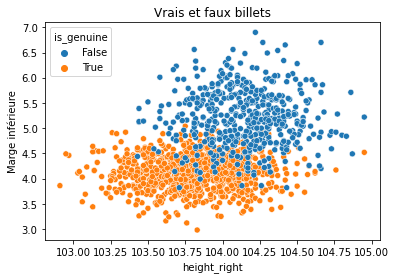

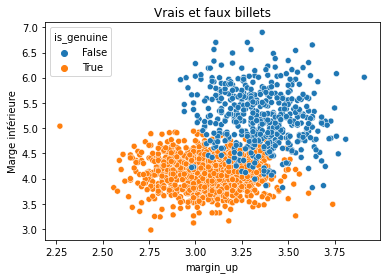

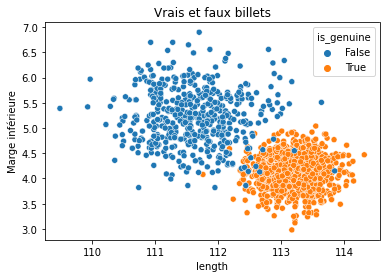

In [41]:
# On utilise un scatterplot pour déterminer quelle variable se prête le mieux à une regression linéaire

variables=[ 'diagonal', 'height_left', 'height_right','margin_up', 'length']

for variable in variables:
    ax = sns.scatterplot(y="margin_low", x=variable,hue="is_genuine", data=billets)
    ax.set_title("Vrais et faux billets")
    ax.set(ylabel="Marge inférieure", xlabel=variable)
    plt.show()

C'est la variable __longueur__, qui, combinée avec la variable __marge inférieure__, se prête le mieux à une régression linéraire. 

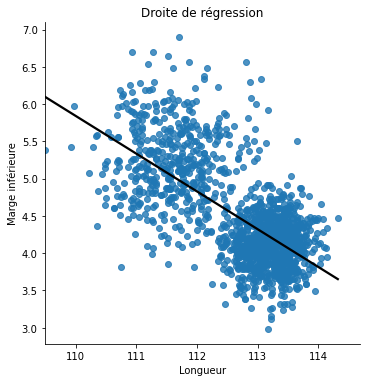

In [42]:
# On confirme cette impression avec un graphe en ligne
ax = sns.lmplot(x="length", y="margin_low",data=billets, ci=None, line_kws={'color':'black'})
ax.set(ylabel='Marge inférieure', xlabel='Longueur',title="Droite de régression")
plt.show()

In [43]:
reg_simp = smf.ols('margin_low ~ length', data=billets).fit()
print(reg_simp.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     1169.
Date:                Thu, 17 Feb 2022   Prob (F-statistic):          8.98e-189
Time:                        13:56:53   Log-Likelihood:                -1045.8
No. Observations:                1463   AIC:                             2096.
Df Residuals:                    1461   BIC:                             2106.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     61.5960      1.670     36.881      0.0

Observons les résultats de ce premier modéle, avec deux variables. 

Le __R^2__, sous l'intitulé __r-squared__, est de 0,445: cela signifie que la variable _length_ explique 44,5% de la variation de la variable _margin_low_   

La __p-value__, qui apparaît ici sous le chapeau __P<|t|__ (utilisant donc le test statisqitue _t_) est de __0__, indiquant qu'il est hautement improbable que le coefficient mesuré soit lié au hasard. 

La __distribution des résidus__, indiquée par __Omnibus__, est de 95,156, soit très proche de 1, donc très proche de la __normalité parfaite. 

L'__homoscédasticité__, soit l'homogénéité de la variance, qui est mesurée ici par le __test de Durbin-Watson__, est de 1,866, c'est-à-dire comprise dans la fourchette idéale 1-2. 

In [44]:
# Peut-on améliorer ce modèle en ajoutant la variable "margin_up"?

reg_dual = smf.ols('margin_low ~ margin_up+length', data=billets).fit()
print(reg_dual.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     607.7
Date:                Thu, 17 Feb 2022   Prob (F-statistic):          9.76e-193
Time:                        13:56:53   Log-Likelihood:                -1032.9
No. Observations:                1463   AIC:                             2072.
Df Residuals:                    1460   BIC:                             2088.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.3957      2.055     26.963      0.0

In [45]:
# Peut-on améliorer le modèle en ajoutant toutes les variables?

reg_mult = smf.ols('margin_low ~ diagonal+height_left+height_right+margin_up+length', data=billets).fit()
print(reg_mult.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Thu, 17 Feb 2022   Prob (F-statistic):          2.60e-202
Time:                        13:56:54   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382   

On constate que l'__ajout de variables__ supplémentaires n'a pas sensiblement amélioré les résultats du modèle, et, au contraire, a __diminué la normalité de la distribution des résidus__.  

On choisit donc de ne prendre que la variable __length__ pour opérer la prédiction des valeurs avec une régression linéaire. 

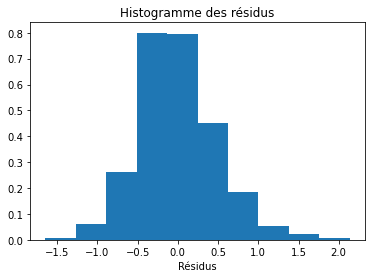

In [46]:
# On observe la normalité de la distribution des résidus

billets['residus_reg_simp'] = reg_simp.resid
plt.hist(billets['residus_reg_simp'], density=True)
plt.xlabel('Résidus')
plt.title('Histogramme des résidus')
plt.show()

Les hypothèses de validité suivantes ont été vérifiées : colinéarité des variables, homoscédasticité et normalité des résidus.

In [47]:
# On prédit des valeurs de marge inférieure en se basant sur length

billets['margin_low_linear']=reg_simp.predict(billets.length)

In [48]:
# On observe le résultat

#billets.sample(7)

In [49]:
# On remplace les valeurs null de margin_low par les valeurs estimées par régression linéraire

billets.margin_low.fillna(billets.margin_low_linear,inplace=True)

In [50]:
# On vérifie

#billets.info()

# Description des données

>"Dans un premier temps, nous souhaitons avoir une analyse descriptive des données, notamment la répartition des dimensions des billets, le nombre de vrais / faux billets, etc."

In [51]:
import plotly.express as px

variables=[ 'diagonal', 'height_left', 'height_right','margin_up','margin_low','length']

for variable in variables:
        fig= px.box(data_frame = billets,y = variable ,color= 'is_genuine')
        fig.show()
        #print(variable)
        


Grâce aux __boxplots__, on constate tout d'abord __l'homogénéité générale__ de la distribution des mesures, ce qui s'explique évidemment par la nature de ce que nous observons: des billets (et leurs copies les plus conformes possibles), qui répondent à des normes strictes de taille. 

Les fourchettes dans lesquelles s'étalent les disparités sont de l'ordre de quelques milimmètres (jamais plus de 4). 

On constate cependant pour __certaines mesures une distinction très nette__ entre les mesures constatées sur les vrais et sur les faux billets: length, magin_up, margin_low. 

Text(0.5, 1.0, 'Vrais et faux billets')

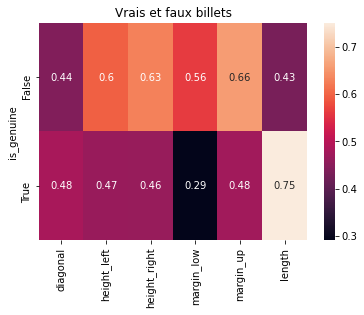

In [52]:
import seaborn as sns

# On prépare un dataframe avec les colonnes nécessaires 
billets_norm=billets.copy()
billets_norm.drop(['residus_reg_simp', 'margin_low_linear'],axis=1,inplace=True)

# On séléctionne les colonnes
x = billets_norm.iloc[:,1:]

# On normalise uniquement ces colonnes
billets_norm.iloc[:,1:] = (x-x.min())/ (x.max() - x.min())

# Groupby
billets_gp=billets_norm.groupby(by='is_genuine').median()

# Heatmap
sns.heatmap(billets_gp,annot=True).set_title("Vrais et faux billets")

Cette heatmap nous montre  que les différences majeures entre vrais et faux billets semblent se situer principalement dans les différences de mesures des __marges inférieures__ des billets, et de __la longueur__.

On constate que, globalement, les faux billets sont _légèrement plus hauts_ (hauteur à gauche et à droite), et _légèrement plus courts_ (longueur), avec des _marges plus importantes_ que les vrais billets. 

# Regression logistique

In [53]:
# Import des packages nécessaires

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

https://www.tutorialspoint.com/logistic_regression_in_python/logistic_regression_in_python_quick_guide.htm

https://realpython.com/logistic-regression-python/

In [54]:
# On garde seulement les colonnes dont on a l'usage

data=billets[['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low','margin_up', 'length']]

https://app.datacamp.com/workspace/w/d439ac4b-db50-4bd6-bb55-7f18285c08c6/edit

In [55]:
#split dataset in features and target variable
X=data[[ 'diagonal', 'height_left', 'height_right', 'margin_low','margin_up', 'length']] # Features
y=data.is_genuine # Target variable


# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# Here, the Dataset is broken into two parts in a ratio of 75:25. 
# It means 75% data will be used for model training and 25% for model testing.


First, import the Logistic Regression module and create a Logistic Regression classifier object using LogisticRegression() function.

Then, fit your model on the train set using fit() and perform prediction on the test set using predict().

In [56]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

Text(0.5, 257.44, 'Statut prédit')

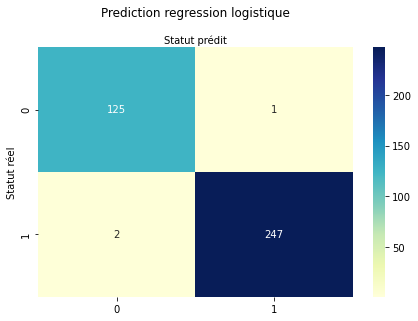

In [57]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
#cnf_matrix

#Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.
#Here, you will visualize the confusion matrix using Heatmap.

class_names=('Vrai','Faux')
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Prediction regression logistique', y=1.1)
plt.ylabel('Statut réel')
plt.xlabel('Statut prédit')

On observe l'excellence du modèle: seuls 2 vrais billets et 1 seul faux billet ont été incorrectement classés. 

In [58]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
#print("Recall:", metrics.recall_score(y_test, y_pred))


Accuracy: 0.992
Precision: 0.9959677419354839


In [59]:
score_ = logreg.score(X, y)
conf_m = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print('report:', report, sep='\n')

report:
              precision    recall  f1-score   support

       False       0.98      0.99      0.99       126
        True       1.00      0.99      0.99       249

    accuracy                           0.99       375
   macro avg       0.99      0.99      0.99       375
weighted avg       0.99      0.99      0.99       375



Les résusltats de la régression logistique sont __excessivement bons__.

L' __exactitude (accuracy)__ est de plus de __99%__, de même que la __précision__. Dans __99,5% des cas__, lorsque le modèle prédit le statutu d'un billet, ce statut est correct. Enfin, le f1-core est lui aussi __proche de la perfection__. 

Il s'agit évidemment d'un effet du jeu de données proposé, on sait par ailleur sque de tels résultats sont rarisssimes.  



# K-means

Text(0.5, 257.44, 'Cluster prédit')

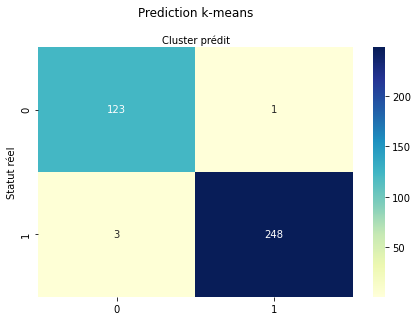

In [60]:
from sklearn.cluster import KMeans

#km = KMeans(n_clusters=2,random_state=0).fit(X)
km = KMeans(n_clusters=2,random_state=0).fit(X_train,y_train)

#billets['cluster_kmeans'] = km.labels_
y_pred=pd.Series(km.predict(X_test))
y_pred.replace(to_replace=[0,1],value=[True,False],inplace=True)
cnf_matrix_kmeans = metrics.confusion_matrix(y_pred,y_test)

#Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.
#Here, you will visualize the confusion matrix using Heatmap.

class_names=('Vrai','Faux')
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_kmeans), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Prediction k-means', y=1.1)
plt.ylabel('Statut réel')
plt.xlabel('Cluster prédit')

Là encore, on constate l' __excellence des prédictions__ : seuls 3 vrais billets ont été incorrectement classés, et un seul faux billet, sur 500. 

## Conclusion:

A ce stade, malgré les excellents résultats des deux modèles, ceux de la __regression logisitique__ sont légèrement supérieurs, puisqu'elle ne présentait que 3 billets incorrectement classés, contre 4 pour le modèle k-means. 

# Test du modèle

In [61]:
df= pd.read_csv('/Users/oliviavolpi/Desktop/test2.csv')

In [62]:
df.head()

,"diagonal,height_left,height_right,margin_low,margin_up,length,id"
0,"171.76,104.01,103.54,5.21,3.3,111.42,A_1"
1,"171.87,104.17,104.13,6.0,3.31,112.09,A_2"
2,"172.0,104.58,104.29,4.99,3.39,111.57,A_3"
3,"172.49,104.55,104.34,4.44,3.03,113.2,A_4"
4,"171.65,103.63,103.56,3.77,3.16,113.33,A_5"


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 1 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   diagonal,height_left,height_right,margin_low,margin_up,length,id  5 non-null      object
dtypes: object(1)
memory usage: 168.0+ bytes


In [64]:
# Si pb de lecture du csv (une seule cellule)
for column in df.columns:
    columns = column.split()
    df = df[column].str.split(",",expand=True)

df.columns=['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length', 'id']

In [65]:
df.set_index('id',inplace = True)

In [66]:
# On vérifie s'il y a bien toutes les données dans la colonne margin_low

if df.margin_low.isna().sum() > 1:
    df['margin_low_linear']=reg_simp.predict(df.length)
    df.margin_low.fillna(df.margin_low_linear,inplace=True)
    #df.drop(margin_low_linear, axis = 1, inplace = True)
    print('Utilisation de la regression lineaire pour predire margin_low')
else:
    print('Pas de données manquantes dans la colonne margin_low')
  

Pas de données manquantes dans la colonne margin_low


In [67]:
# Dé-commenter s'il a fallu remplacer les données manquantes
#df.drop(margin_low_linear, axis = 1, inplace = True)

In [68]:
df

,diagonal,height_left,height_right,margin_low,margin_up,length
id,,,,,,
A_1,171.76,104.01,103.54,5.21,3.3,111.42
A_2,171.87,104.17,104.13,6.0,3.31,112.09
A_3,172.0,104.58,104.29,4.99,3.39,111.57
A_4,172.49,104.55,104.34,4.44,3.03,113.2
A_5,171.65,103.63,103.56,3.77,3.16,113.33


In [69]:
# Application des algorithmes de prédiction

y_pred_log = logreg.predict(df)

y_pred_kmeans=km.predict(df)


In [70]:
# Ajout des prédictions dans le dataframe
df['log_predict']=y_pred_log

df['kmeans_predict']=y_pred_kmeans
df.kmeans_predict.replace(to_replace=[0,1],value=[True,False],inplace=True)

df

,diagonal,height_left,height_right,margin_low,margin_up,length,log_predict,kmeans_predict
id,,,,,,,,
A_1,171.76,104.01,103.54,5.21,3.3,111.42,False,False
A_2,171.87,104.17,104.13,6.0,3.31,112.09,False,False
A_3,172.0,104.58,104.29,4.99,3.39,111.57,False,False
A_4,172.49,104.55,104.34,4.44,3.03,113.2,True,True
A_5,171.65,103.63,103.56,3.77,3.16,113.33,True,True


# Dans le cadre de l'exercice: test sur nouvelles données. 

#y= # insérer données de vérification
cnf_matrix_log = metrics.confusion_matrix(y, y_pred_log)
cnf_matrix_kmeans = metrics.confusion_matrix(y, y_pred_kmeans)

# Heatmaps
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Prediction regression logistique', y=1.1)
plt.ylabel('Statut réel')
plt.xlabel('Cluster prédit')
plt.show()

sns.heatmap(pd.DataFrame(cnf_matrix_kmeans), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Prediction k-means', y=1.1)
plt.ylabel('Statut réel')
plt.xlabel('Cluster prédit')
plt.show()